# Distribution
* use describe()
* use correlation - corr()
* need to get numbers in right format


In [14]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
combDF = pd.read_csv("../data/combDF.csv")
combDF.head()

,timestamp,hour,weekday,month,site_id,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,0,4,1,0,0,0,0.0,Education,7432,25.0,20.0,1019.7,0.0,0.0
1,2016-01-01 00:00:00,0,4,1,0,1,0,0.0,Education,2720,25.0,20.0,1019.7,0.0,0.0
2,2016-01-01 00:00:00,0,4,1,0,2,0,0.0,Education,5376,25.0,20.0,1019.7,0.0,0.0
3,2016-01-01 00:00:00,0,4,1,0,3,0,0.0,Education,23685,25.0,20.0,1019.7,0.0,0.0
4,2016-01-01 00:00:00,0,4,1,0,4,0,0.0,Education,116607,25.0,20.0,1019.7,0.0,0.0


In [18]:
bMetaData = pd.read_csv("../kaggle-data/building_metadata.csv")
bMetaData.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


# Summary of Data
* square feet useful as it gives range of building size

In [24]:
x = combDF.drop(columns = ['site_id','building_id','primary_use','timestamp','meter']).describe()
x.astype(object)

,square_feet,meter_reading,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
count,1.76847e+07,1.76847e+07,1.76847e+07,1.76847e+07,1.76847e+07,1.76847e+07,1.76847e+07
mean,108697,2309.16,15.714,7.33635,1016.11,172.029,3.3987
std,118044,160629,11.0027,10.2612,7.13655,114.415,2.28871
min,283,0,-28.9,-35,968.2,0,0
25%,33530,19.992,8.3,0,1011.6,70,2.1
50%,73488,83.1383,16.7,8.3,1016.1,170,3.1
75%,140092,281.625,23.9,15.6,1020.6,280,4.6
max,875000,2.19047e+07,47.2,26.1,1045.5,360,19


# Distributions
* Bar graph of how many meter types - mostly electricity

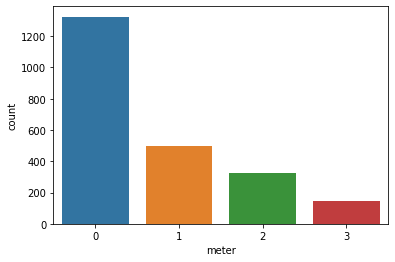

In [37]:
x = combDF[['building_id','meter']]
x = x.drop_duplicates()
#x.to_csv('output.csv')


sns.countplot(x='meter',data=x)

* how many meter points per building

[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

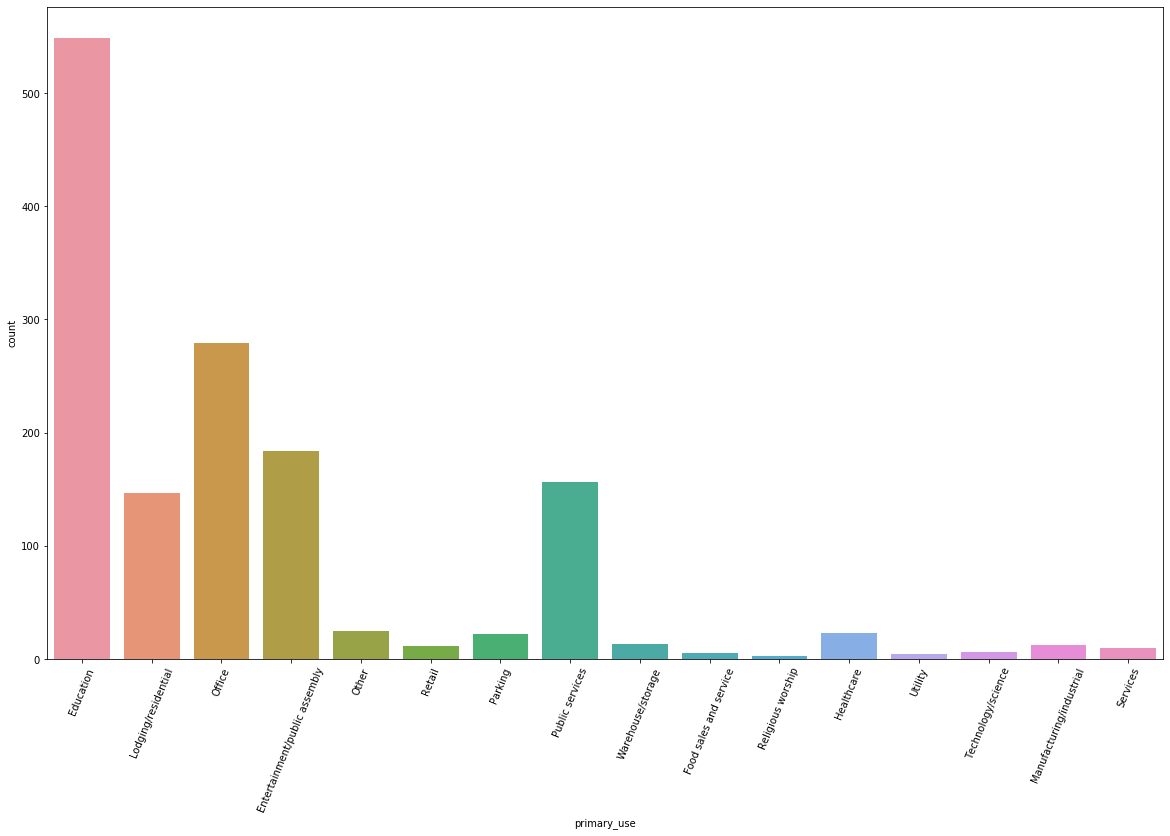

In [23]:
plt.figure(figsize=(20,12))
chart = sns.countplot(x='primary_use',data=bMetaData)
chart.set_xticklabels(chart.get_xticklabels(), rotation=67.5)

* Histogram of square feet to get building sizes

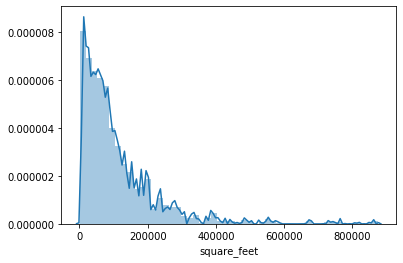

In [6]:
sns.distplot(combDF['square_feet'])

* Histogram of square feet according to use type

In [ ]:
* Need meter reading max, min, etc per site
* Division between time stamp related and site related

# Building Attributes
* Square feet histogram
* Primary Use historgram
* Number of each metering point

# Energy Use per items
* Energy use based on Square feet histogram
* Energy use based on Primary use
* Histogram of average of all weather items and energy

# How do I want to present each variable?  What questions?  What are they proxies for?
* I am assuming 1 algorithm for all types of meters - but won't different variables impact them - algorithm will take that into account

# Correlation
* Meter_reading - most highly correlated with square feet, makes sense, others little correlation, surprised air temp has such low correlation with meter_reading (may because all three types)
* When group by meter relationships become strong between variables

In [6]:
combDF.drop(columns = ['site_id','building_id','timestamp','meter']).corr()

,square_feet,meter_reading,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
square_feet,1.000000,0.025103,-0.039060,-0.039664,-0.021316,-0.005719,-0.016695
meter_reading,0.025103,1.000000,-0.004134,-0.003073,-0.004400,0.000012,0.006596
air_temperature,-0.039060,-0.004134,1.000000,0.756527,-0.312221,-0.091821,-0.051230
dew_temperature,-0.039664,-0.003073,0.756527,1.000000,-0.217198,-0.175779,-0.135890
sea_level_pressure,-0.021316,-0.004400,-0.312221,-0.217198,1.000000,-0.098390,-0.212188
wind_direction,-0.005719,0.000012,-0.091821,-0.175779,-0.098390,1.000000,0.437329
wind_speed,-0.016695,0.006596,-0.051230,-0.135890,-0.212188,0.437329,1.000000


In [8]:
combDF.drop(columns = ['site_id','building_id','timestamp']).groupby('meter').corr()

square_feet  meter_reading  air_temperature  \
meter                                                                   
0     square_feet            1.000000       0.547088        -0.032008   
      meter_reading          0.547088       1.000000        -0.022885   
      air_temperature       -0.032008      -0.022885         1.000000   
      dew_temperature       -0.040630      -0.004316         0.767144   
      sea_level_pressure    -0.022302      -0.013727        -0.279991   
      wind_direction        -0.006973       0.004092        -0.095111   
      wind_speed            -0.019909      -0.009564        -0.043595   
1     square_feet            1.000000       0.041411        -0.058411   
      meter_reading          0.041411       1.000000         0.035106   
      air_temperature       -0.058411       0.035106         1.000000   
      dew_temperature       -0.006984       0.052027         0.714924   
      sea_level_pressure     0.011581       0.003520        -0.380752   
      wind_direction         0.008675      -0.008536        -0.084233   
      wind_speed             0.009813      -0.009502        -0.058745   
2     square_feet            1.000000       0.049586        -0.013485   
      meter_reading          0.049586       1.000000        -0.004002   
      air_temperature       -0.013485      -0.004002         1.000000   
      dew_temperature       -0.014951      -0.006946         0.908032   
      sea_level_pressure    -0.023776      -0.013870        -0.271525   
      wind_direction         0.012644       0.001683        -0.139474   
      wind_speed             0.025037       0.020714        -0.127124   
3     square_feet            1.000000       0.124494         0.042115   
      meter_reading          0.124494       1.000000        -0.118456   
      air_temperature        0.042115      -0.118456         1.000000   
      dew_temperature       -0.041790      -0.088372         0.573947   
      sea_level_pressure    -0.045783       0.049001        -0.425853   
      wind_direction        -0.011032       0.017213        -0.022166   
      wind_speed            -0.008877       0.010344         0.037541   

                          dew_temperature  sea_level_pressure  wind_direction  \
meter                                                                           
0     square_feet               -0.040630           -0.022302       -0.006973   
      meter_reading             -0.004316           -0.013727        0.004092   
      air_temperature            0.767144           -0.279991       -0.095111   
      dew_temperature            1.000000           -0.198076       -0.175589   
      sea_level_pressure        -0.198076            1.000000       -0.103072   
      wind_direction            -0.175589           -0.103072        1.000000   
      wind_speed                -0.127832           -0.212947        0.421703   
1     square_feet               -0.006984            0.011581        0.008675   
      meter_reading              0.052027            0.003520       -0.008536   
      air_temperature            0.714924           -0.380752       -0.084233   
      dew_temperature            1.000000           -0.241036       -0.182725   
      sea_level_pressure        -0.241036            1.000000       -0.102017   
      wind_direction            -0.182725           -0.102017        1.000000   
      wind_speed                -0.159876           -0.218280        0.461366   
2     square_feet               -0.014951           -0.023776        0.012644   
      meter_reading             -0.006946           -0.013870        0.001683   
      air_temperature            0.908032           -0.271525       -0.139474   
      dew_temperature            1.000000           -0.317884       -0.223365   
      sea_level_pressure        -0.317884            1.000000       -0.090645   
      wind_direction            -0.223365           -0.090645        1.000000   
      wind_speed                -0.225468           -

# Correlation Monthly, Weekday, Hourly